In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Project\adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# EDA

In [5]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})

# Age

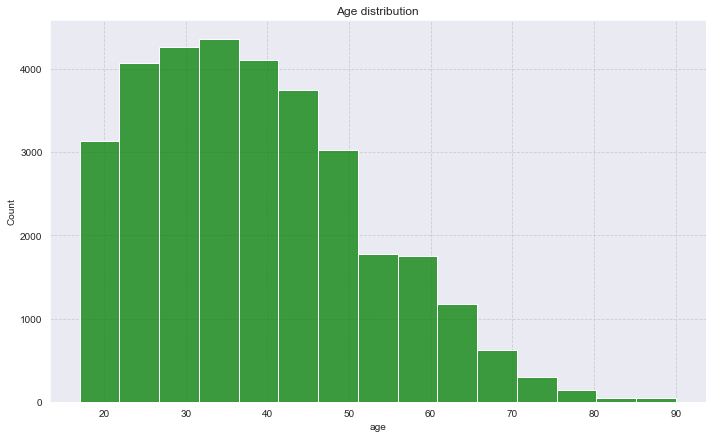

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'],color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Age distribution')
plt.show()

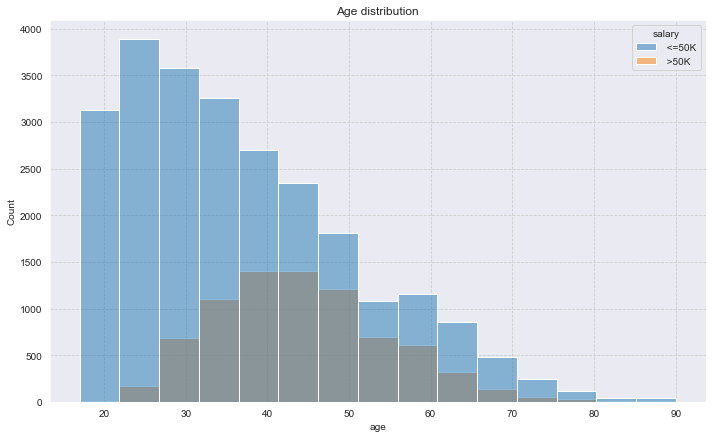

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['age'],hue=df['salary'],color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Age distribution')
plt.show()

## From the graph we can see that in the age group 0-20 there isn't any entry of salary greater than 50k, same goes with the group greater than 75 years.

# 

# Work Class

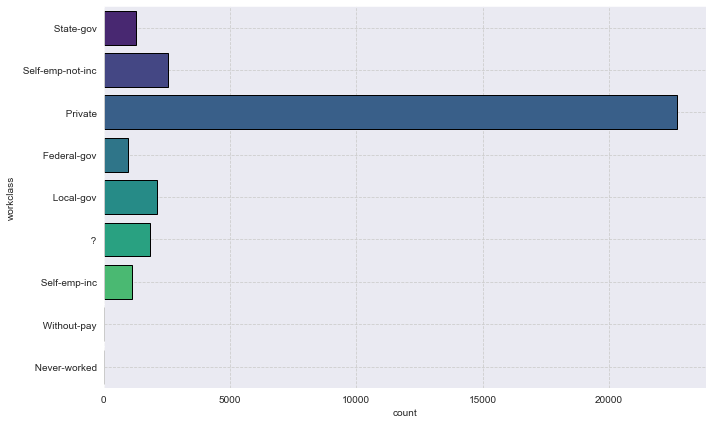

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['workclass'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

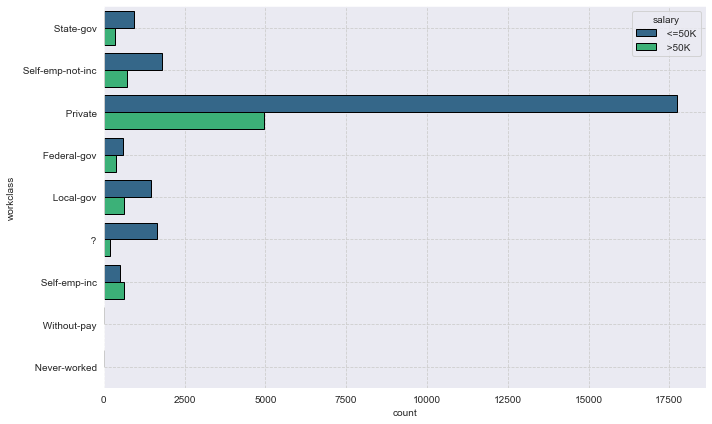

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['workclass'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

## - The majority of the individuals work in the private sector. The probabilities of making               above 50,000 are similar among the work classes except for self-emp-inc and federal                 government. Federal government is seen as the most elite in the public sector, which               most likely explains the higher chance of earning more than 50,000.

## - There is a workclass named as '?', which we will treat as NAN values.

# 

# FnlWgt

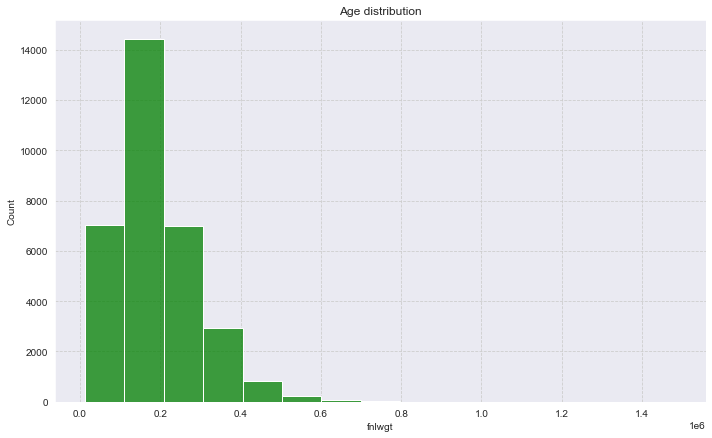

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(df['fnlwgt'],color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Age distribution')
plt.show()

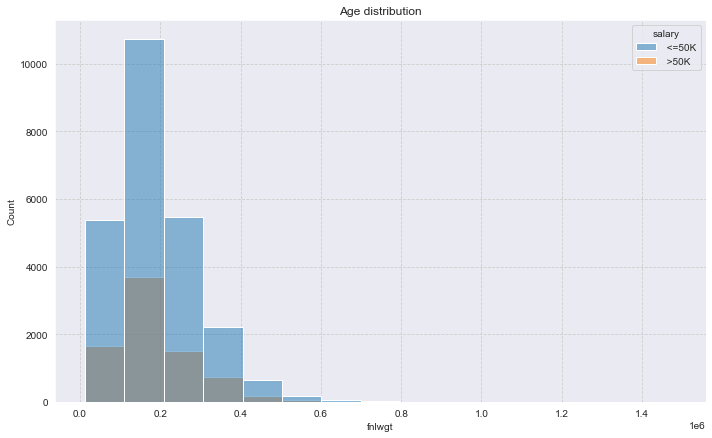

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['fnlwgt'],hue=df['salary'],color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Age distribution')
plt.show()

# From the above graphs we can see that there doesn't exist any pattern for fnlwgt: final weight.

# 

# Education

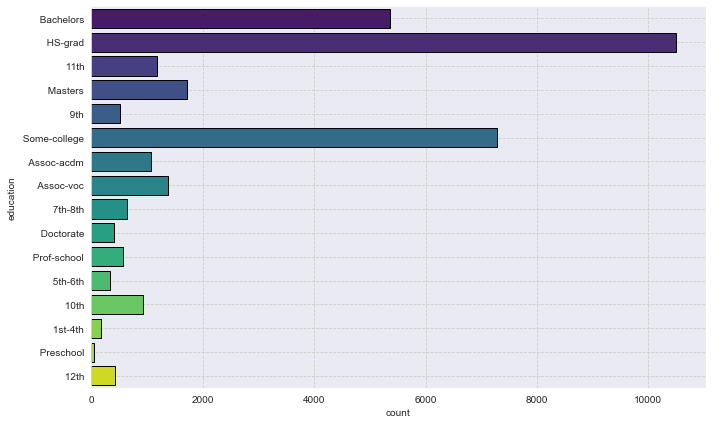

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['education'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

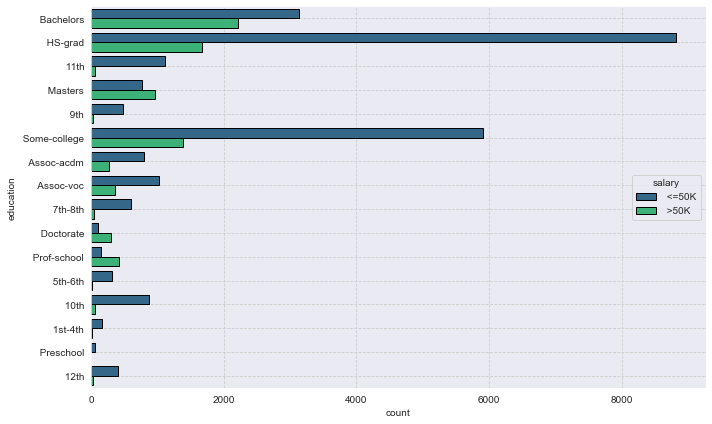

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['education'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

# Lets club the Preschool through 12th grade into Other Category, as they are depecting the same pattern and less in number.

In [14]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [15]:
def edu_edit(val):
    
    if (val==' Preschool'):
        return 'Other'
    elif (val==' 1st-4th'):
        return 'Other'
    elif (val==' 5th-6th'):
        return 'Other'
    elif (val==' 7th-8th'):
        return 'Other'
    elif (val==' 9th'):
        return 'Other'
    elif (val==' 10th'):
        return 'Other'
    elif (val==' 11th'):
        return 'Other'
    elif (val==' 12th'):
        return 'Other'
    else:
        return val

In [16]:
df['education']=df['education'].apply(edu_edit)

In [17]:
df['education'].unique()

array([' Bachelors', ' HS-grad', 'Other', ' Masters', ' Some-college',
       ' Assoc-acdm', ' Assoc-voc', ' Doctorate', ' Prof-school'],
      dtype=object)

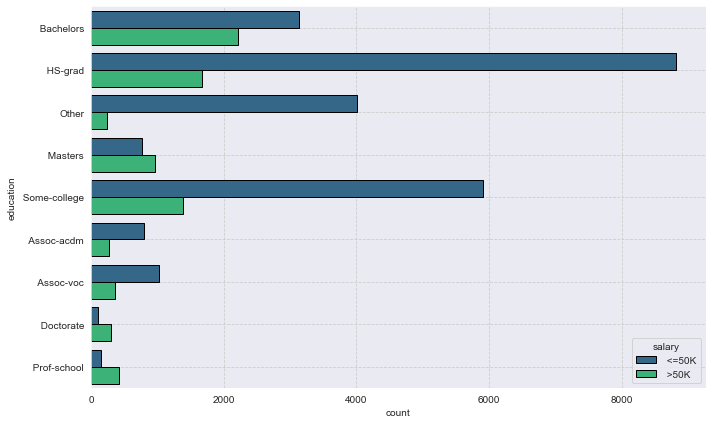

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['education'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

## Most of the individuals in the dataset have at most a high school education while only a small portion have a doctorate. For the most part, a higher level of education is correlated to a higher percentage of individuals with the label >50k.

# 

# marital-status

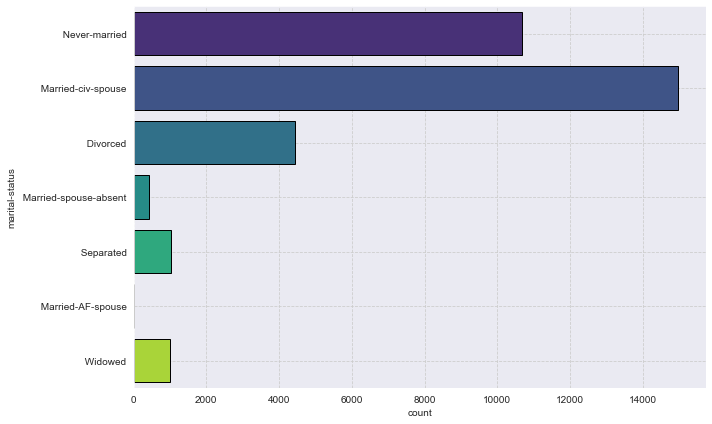

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['marital-status'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

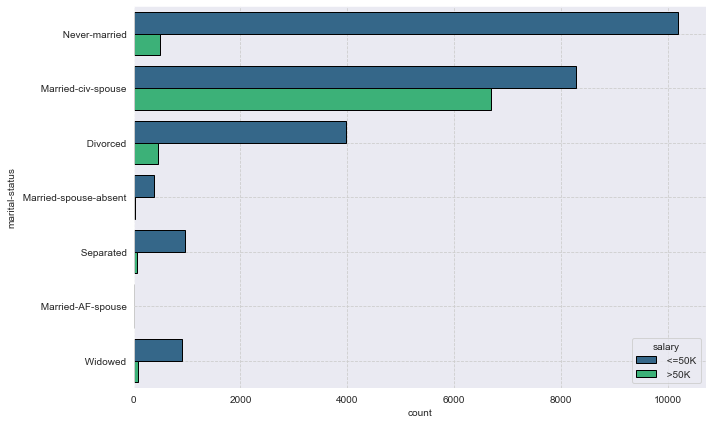

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['marital-status'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

## In class Married-civ-spouse there is more percentage of values with more than 50k salary. We can transform this variable as married and not married.

In [21]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [22]:
def married(val):
    if val==' Never-married':
        return 'not-married'
    elif val==' Divorced':
        return 'not-married'
    elif val==' Separated':
        return 'not-married'
    elif val==' Widowed':
        return 'not-married'
    else:
        return 'married'

In [23]:
df['marital-status']=df['marital-status'].apply(married)

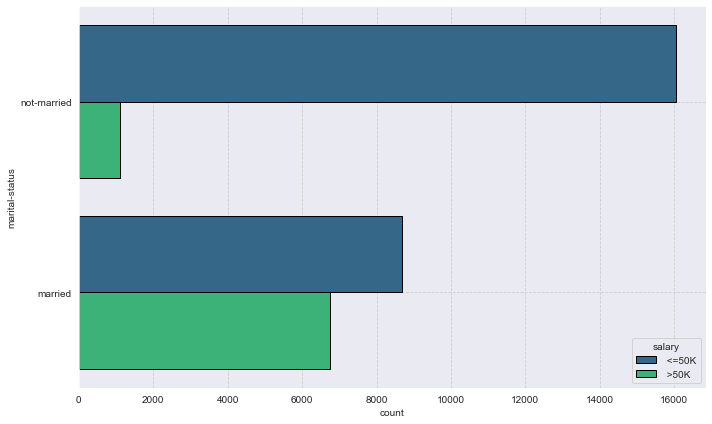

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['marital-status'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()


## Now we can see that if a person is married then the proportion of having salary more than 50k is high, and if they are unmarried then proportion of having salary more than 50k is low.

# 

# occupation

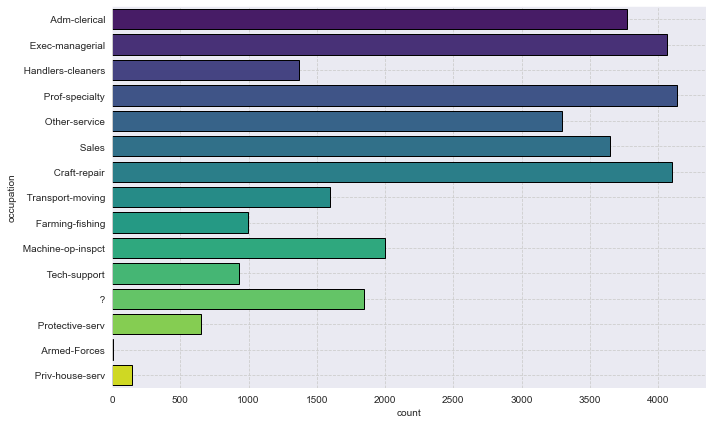

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['occupation'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

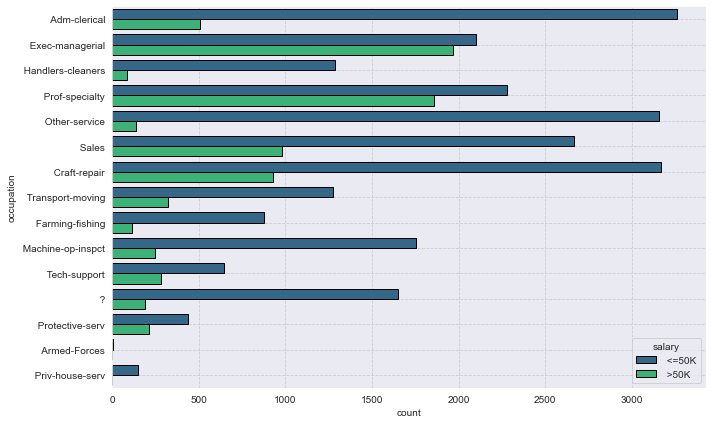

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['occupation'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

## - As seen in Figure 7, there is a somewhat uniform distribution of occupations in the dataset, disregarding the absence of Armed Forces. However, looking at Figure 8 Occupation vs Income, exec­managerial and prof specialty stand out as having very high percentages of individuals making over 50,000. In addition, the percentages for Farming fishing, Other service and Handlers cleaners are significantly lower than the rest of the distribution.

## - There is a occupation named as '?', which we will treat as NAN values.

# 

# relationship

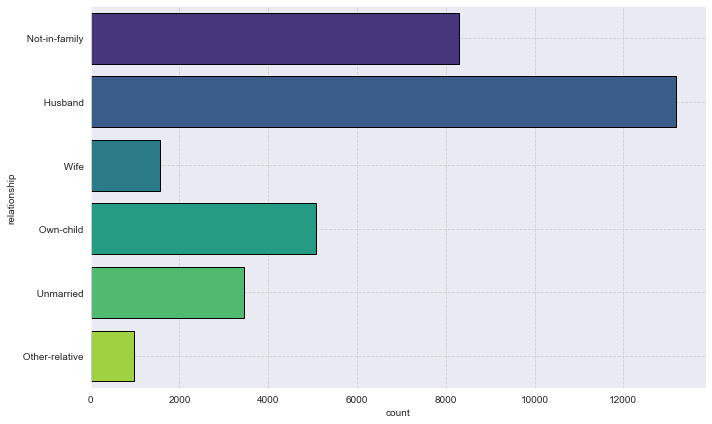

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['relationship'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

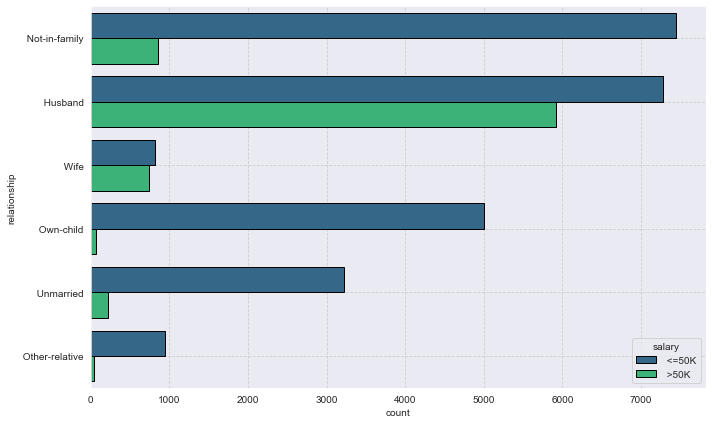

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['relationship'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

## There is more percentage of values of more than 50k in Husband class. And least in Other-relative. This feature provides same information as maritial status.

# 

# race

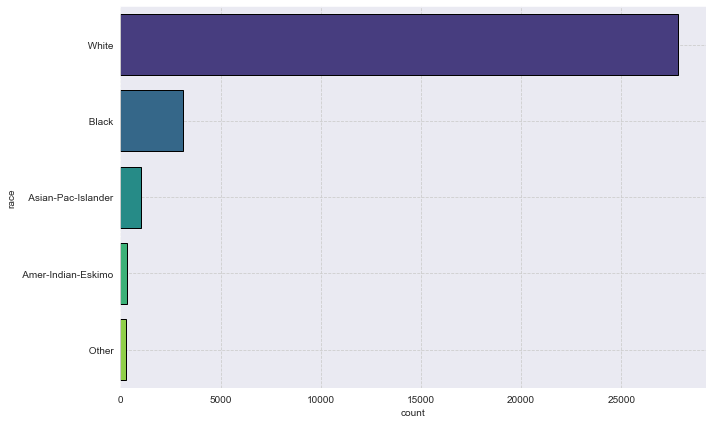

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['race'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

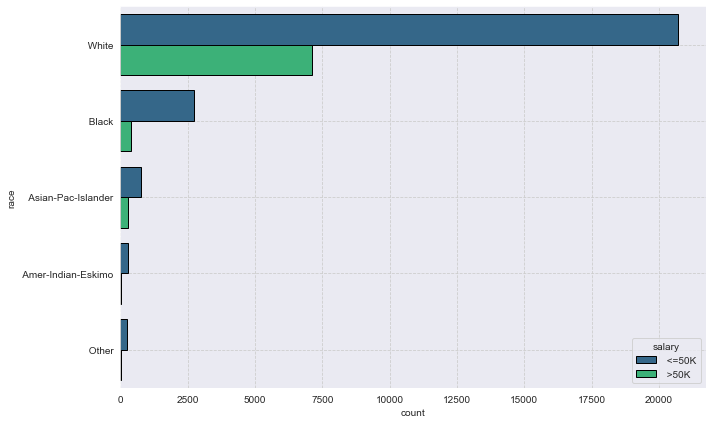

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['race'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

## it seems like the feature could be useful in our prediction model, as Whites and Asians have a larger percentage of entries greater than 50,000 than the rest of the races. However, the sample size of Whites in the dataset is disproportionately large in comparison to all other races. The second most represented group is Blacks with less than 5000 entries. The lack of equal distribution caused us to consider not utilizing this attribute in our prediction model.

# 

# sex

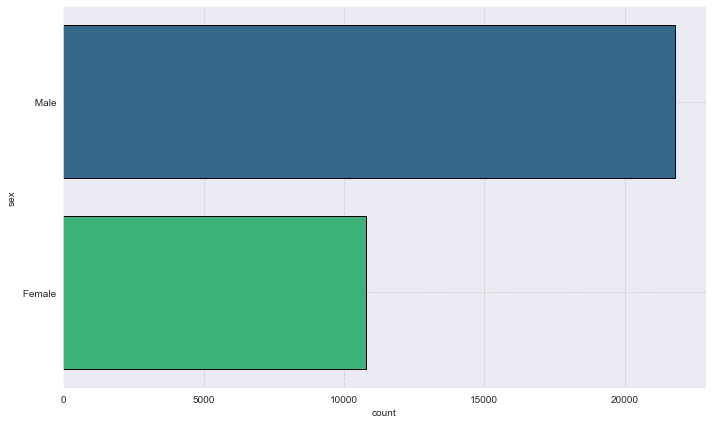

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['sex'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

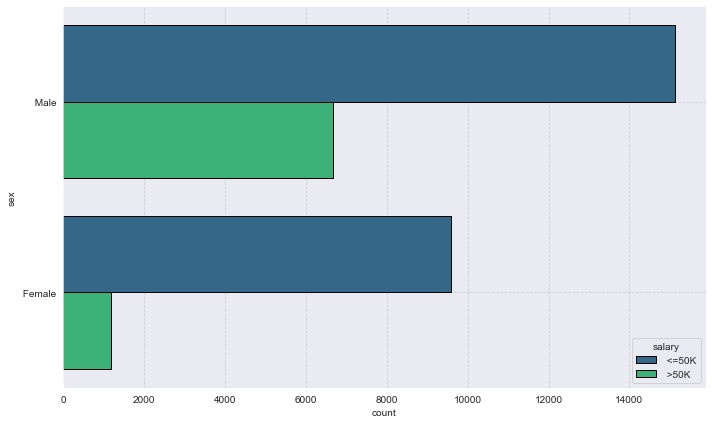

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['sex'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

## The percentage of males who make greater than 50,000 is much greater than the percentage of females that make the same amount. This will certainly be a significant factor, and should be a feature considered in our prediction model.

# 

# capital-gain

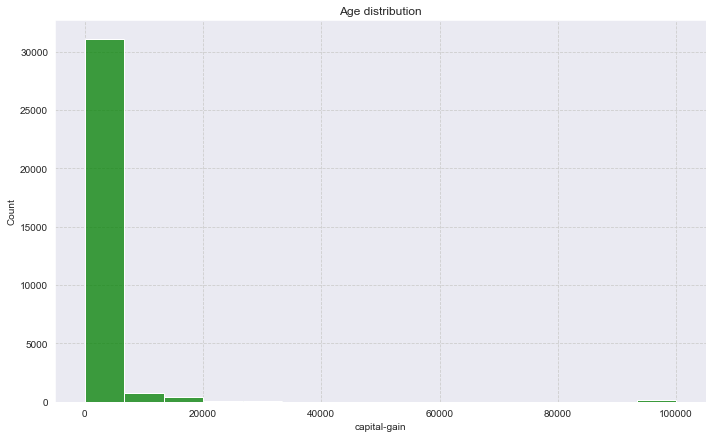

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(df['capital-gain'],color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Age distribution')
plt.show()

## - From the graph we can see that the distribution of capital gain is very skewed.
## - And there are outliers at data poitn 100000.

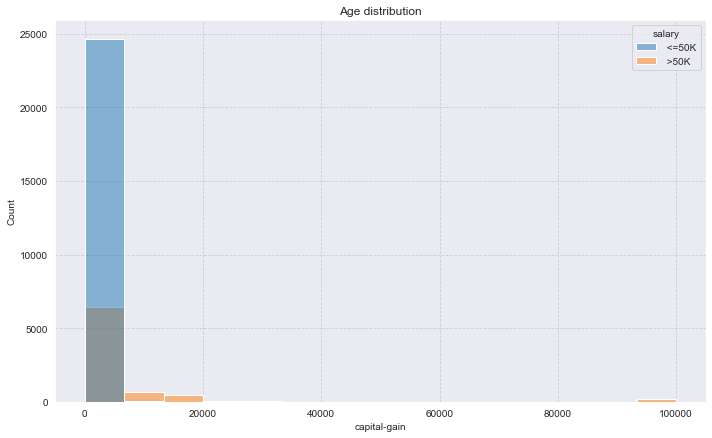

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['capital-gain'],hue=df['salary'],color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Age distribution')
plt.show()

# capital-loss

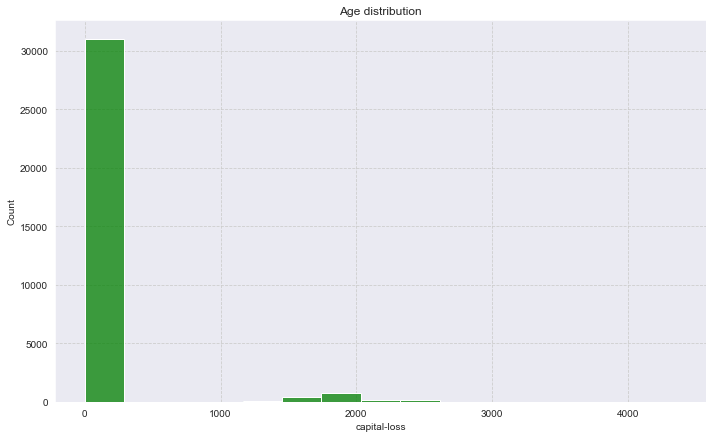

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(df['capital-loss'],color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Age distribution')
plt.show()

## From the graph we can see that the data is very unsemmetrical.

# 

# hours-per-week

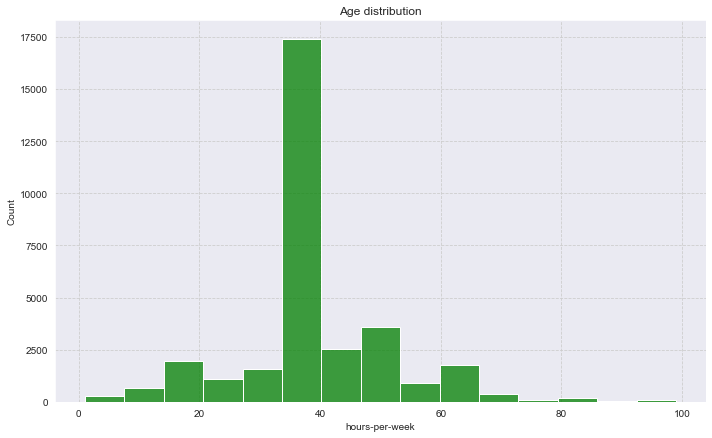

In [36]:
plt.figure(figsize=(10,6))
sns.histplot(df['hours-per-week'],color='green',bins=15)
plt.tight_layout()
plt.grid(True)
plt.title('Age distribution')
plt.show()

## We can see that vast majority of values are of 40 hours. what we can do is make 3 classes, i.e <40hrs, 40hrs and >40hrs, and check whther it is significant or not.

In [37]:
def hrs_edit(val):
    if (val<40):
        return ('<40 hrs')
    elif (val==40):
        return ('40 hrs')
    else:
        return ('>40hrs') 

In [38]:
df['hours-per-week']=df['hours-per-week'].apply(hrs_edit)

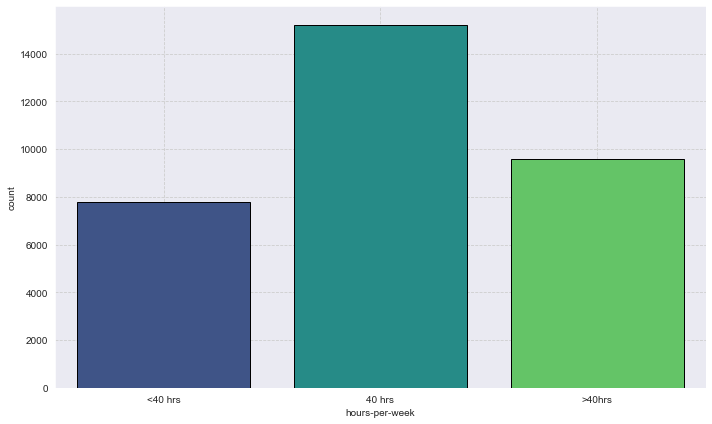

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['hours-per-week'],palette='viridis',saturation=0.9,edgecolor="black",order=['<40 hrs','40 hrs','>40hrs'])
plt.tight_layout()
plt.grid(True)
plt.show()

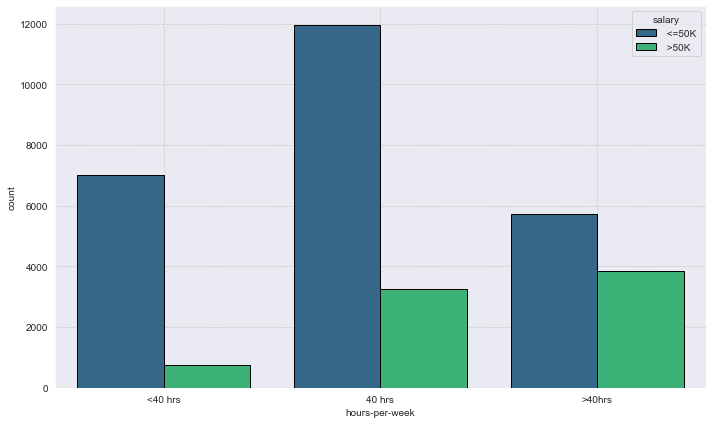

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['hours-per-week'],hue=df['salary'],palette='viridis',
              saturation=0.9,edgecolor="black",order=['<40 hrs','40 hrs','>40hrs'])
plt.tight_layout()
plt.grid(True)
plt.show()

## The percentage of individuals making over 50,000 drastically decreases when less than 40 hours per week, and increases significantly when greater than 40 hours per week.

# 

# country

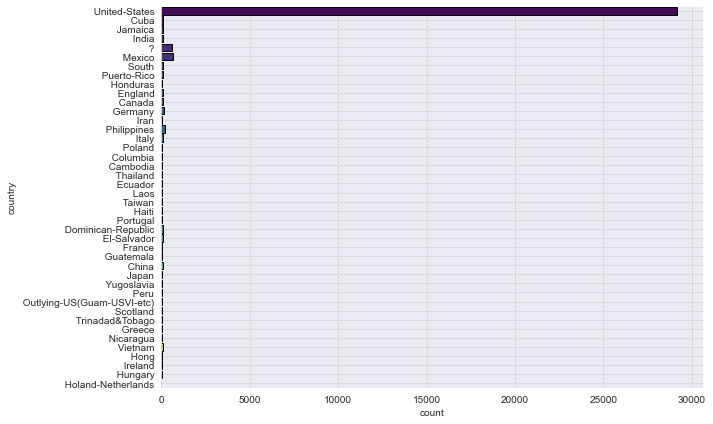

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['country'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

## This feature doesn't give any information, hence we will drop this column from your dataset for prediction.

# 

# Feature engineering
## 1. We will drop the features:
### - education-num
### - relationship
### - race
### - country
## 2. Impute Nan values with mode.

## 3. train - test split.

## 4. Lable encoding.

In [42]:
df.drop(['education-num','relationship', 'race', 'country'],axis=1,inplace=True)

In [43]:
df[df == ' ?'] = np.nan

In [44]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
marital-status       0
occupation        1843
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
salary               0
dtype: int64

In [45]:
for col in ['workclass', 'occupation']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [46]:
X = df.drop(['salary'], axis=1)

y = df['salary']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [48]:
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital-status', 'occupation', 'sex','hours-per-week']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])
        
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

# Model fitting

# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier(random_state=42,criterion='entropy',splitter='random')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42, splitter='random')

In [50]:
model.score(X_test,y_test)

0.8061214044426246

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=145, random_state=40,criterion='entropy',max_depth=95)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=95, n_estimators=145,
                       random_state=40)

In [52]:
model.score(X_test,y_test)

0.8504452861091207

# XG boost

In [53]:
from xgboost import XGBRFClassifier

model = XGBRFClassifier(eval_metric='mlogloss',
                        random_state=42,
                       learning_rate=0.01,
                       max_depth=10, 
                       scale_pos_weight=1.5)
model.fit(X_train, y_train)

XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric='mlogloss', gamma=0, gpu_id=-1,
                grow_policy='depthwise', importance_type=None,
                interaction_constraints='', learning_rate=0.01, max_bin=256,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=10,
                max_leaves=0, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=0,
                num_parallel_tree=100, objective='binary:logistic',
                predictor='auto', random_state=42, reg_alpha=0,
                sampling_method='uniform', ...)

In [54]:
model.score(X_test,y_test)

0.8442010441191524

# KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [56]:
model.score(X_test,y_test)

0.7785853209130924

# Random Forest is best model to classify the given problem with 85% accuracy.